## 1. K-Means clustering with simulated data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans       #k군집화된 평균으로 군집화 설치
from sklearn.datasets import make_blobs  #sklearn.datasets에서 make_blobs 덩어리만들어주는 함수 가져옴
%matplotlib inline

### 1.1. Generate simulated data and visualize: 시뮬레이션된 데이터로 시각화

**데이터셋 1**

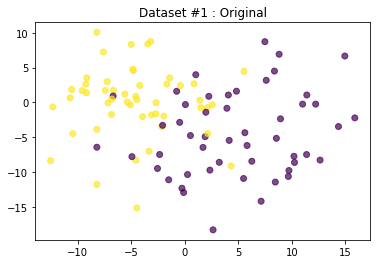

In [2]:
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)  
#100개좌표, 2개의좌표축(가로세로) 3하면 가로세로높이, 센터는 2개, 센터거리는 5, random_state는 seed역할

plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )   
#x1은 좌표를 가져다주는 변수, label1은 색깔을 정해주는 변수, 산점도 그림 
#x1은 하나의 넘피배열인데 두개의 축(가로세로) 
#가로는 0이라는 칼럼서 가져오고 세로는 1이라는 칼럼에서 가져옴
#c(색깔)는 label1에서 가져옴, alpha는 투명도를 줘서 겹쳤음을 보여줌

plt.title('Dataset #1 : Original')  #그래프 제목 삽입
plt.show() #그래프 그림

#결과는 두개 클러스터 만들어짐 
#센터거리를 5에서 3으로 하면 군집간에 간격이 타이트해짐 
#센터와 거리에 따라 그래프 달라짐

**데이터셋 2**

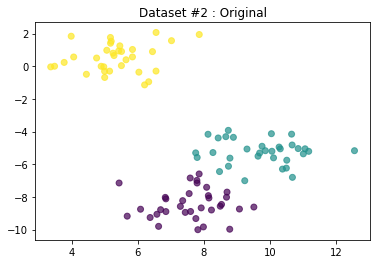

In [3]:
X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1, random_state=321)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#3개의 군집거리는 1이라 타이트하게 몰려있음

### 1.2. Apply k-means clustering and visualize: 2개의 데이터셋을 각각 군집화 

**데이터셋 1을 2개로 군집화**

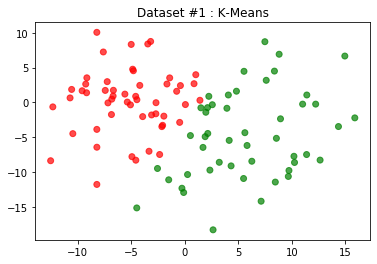

In [4]:
kmeans = KMeans(n_clusters=2,random_state=123)  # KMeans클래스로 kmeans객체만듬, 클러스터2개, 랜덤123 (2개 군집 만들기 위해 객체 만듬)
kmeans.fit(X1)                                  # kmeans에 좌표의미하는 x1을 넣어 이걸가지고 비지도학습 함(Unsupervised learning)   
myColors = {0:'red',1:'green', 2:'blue'}    # 0이면 레드, 1이면 그린 => 2개 군집결과 나와서 2개만 사용됨(수치를 색깔로 변환-판다스)  

plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
# kmeans.labels_에 레이블 들어있고(0,1,2~), 이걸 시리즈화한뒤 apply로 컬러를 입힘

plt.title('Dataset #1 : K-Means')
plt.show()


**데이터셋 1을 3개로 군집화**

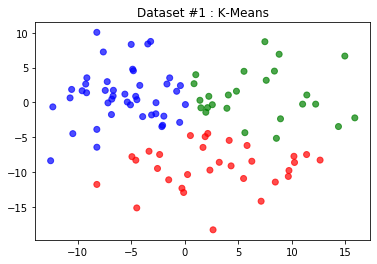

In [5]:
kmeans = KMeans(n_clusters=3,random_state=123)   # 3개 군집 만들기 위해 kmeans 객체 만듬
kmeans.fit(X1)                                                   
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.title('Dataset #1 : K-Means')
plt.show()

**데이터셋 2를 2개로 군집화**

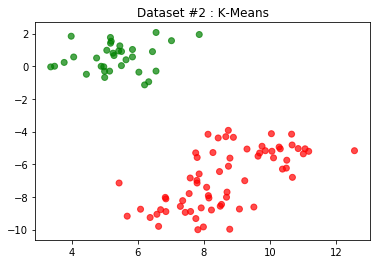

In [6]:
kmeans = KMeans(n_clusters=2,random_state=123)        
kmeans.fit(X2)                                                
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

**데이터셋 2를 3개로 군집화**

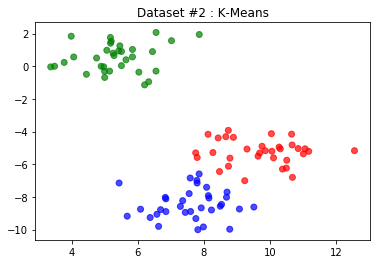

In [7]:
kmeans = KMeans(n_clusters=3, random_state=123)                
kmeans.fit(X2)                                                  
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

#### [Kmeans 군집화방법]

#### 군집화를 통해 데이터 사이의 구조를 보여준다. 하지만 항상 보증하지는 않는다

#### 구조를 보여주기위해 군집화할 때 군집경계선은 선형으로 보여준다